# Core Classical ML Algorithms (Part 1)

## Decision Trees

- Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.    
- The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

#### 📘 Definition:
A Decision Tree is a supervised learning algorithm that splits data into branches based on decision rules, forming a tree-like structure where internal nodes represent features, branches represent decision rules, and leaf nodes represent final predictions or outcomes.


#### How it works:
- Start with all data – You have features (inputs) and a target (output).

- Pick the first "question" (split)

    - The algorithm looks at all features and finds the split that best separates the data into pure groups.
    
    - "Best" usually means the split that reduces impurity the most (measured by Gini index, Entropy/Information Gain, or Variance reduction in regression).
    
- Split into branches: After picking the best question, data is divided into two or more branches based on the answer.

- Repeat the process – Keep splitting each branch until:

    - The data is pure (only one class/value), or
    
    - A stopping rule is met (max depth, min samples per leaf).

- Make predictions – At each leaf, output the most common class (classification) or the average value (regression).
 
#### 🔧 When to Use:

- When you need an interpretable model for classification or regression.
- When relationships between features and output are nonlinear and complex.

#### 🌍 Where to Use:

- Credit risk assessment in banking.
- Diagnosing diseases based on symptoms.
- Predicting customer churn in telecom.

#### 💡 Use Case:
A bank uses a decision tree to determine whether to approve a loan. The model checks income level, credit score, and debt-to-income ratio, splitting at each decision point until a final “Approve” or “Reject” outcome is reached.

#### ⚠️ Limitations:

- Can overfit easily if not pruned.
- Sensitive to small changes in data, which may produce very different trees.
- Biased toward features with more levels.

#### ✅ Advantages: 
- Decision trees are easy to understand
- Require little data preparation
- Can handle both numerical and categorical data
- They are also able to handle multi-output problems
- Can be validated using statistical tests.

#### ❓ Why is it Used?:
To create clear, rule-based decision systems that are easy to explain and implement while handling complex patterns in data.

#### 📐 Key Concept:
At each node, the algorithm chooses the split that maximizes information gain (classification) or reduces variance (regression), using metrics like Gini Impurity, Entropy, or MSE.

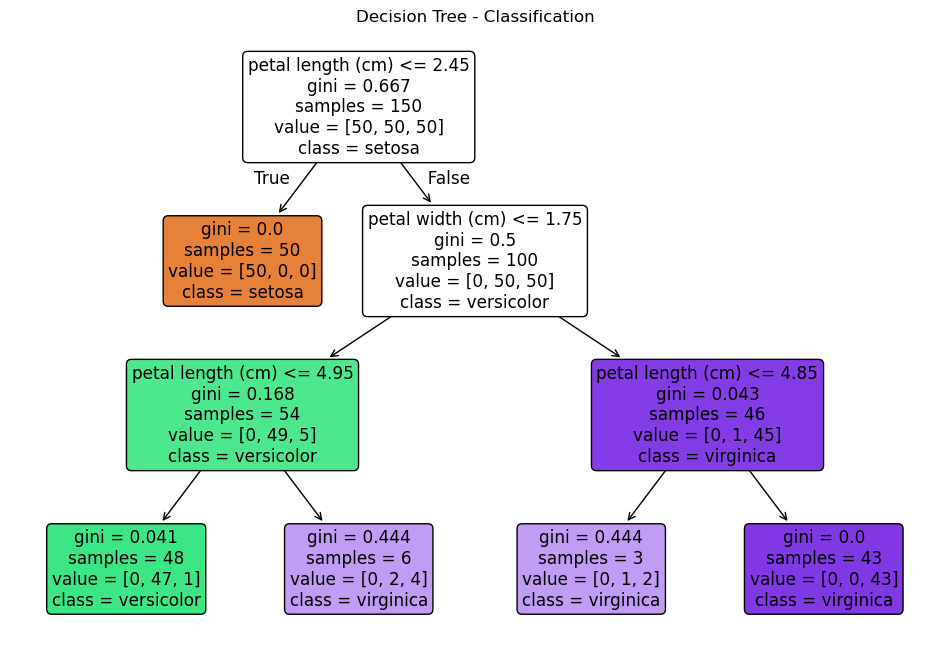

In [102]:
# Classification Example
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create Decision Tree classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(12,8))
plot_tree(clf, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True)
plt.title("Decision Tree - Classification")
plt.show()

The plot displays a tree structure with nodes and branches.

Root node: The top node represents the first feature and threshold used to split the data for maximum class separation.

Branches: Each branch represents a decision based on a feature threshold.

Leaf nodes: The terminal nodes show the predicted class for the samples in that branch.

Node information: Each node includes the number of samples, class distribution, and predicted class.

Colors: Node colors indicate class purity—darker colors mean the node is more homogeneous.

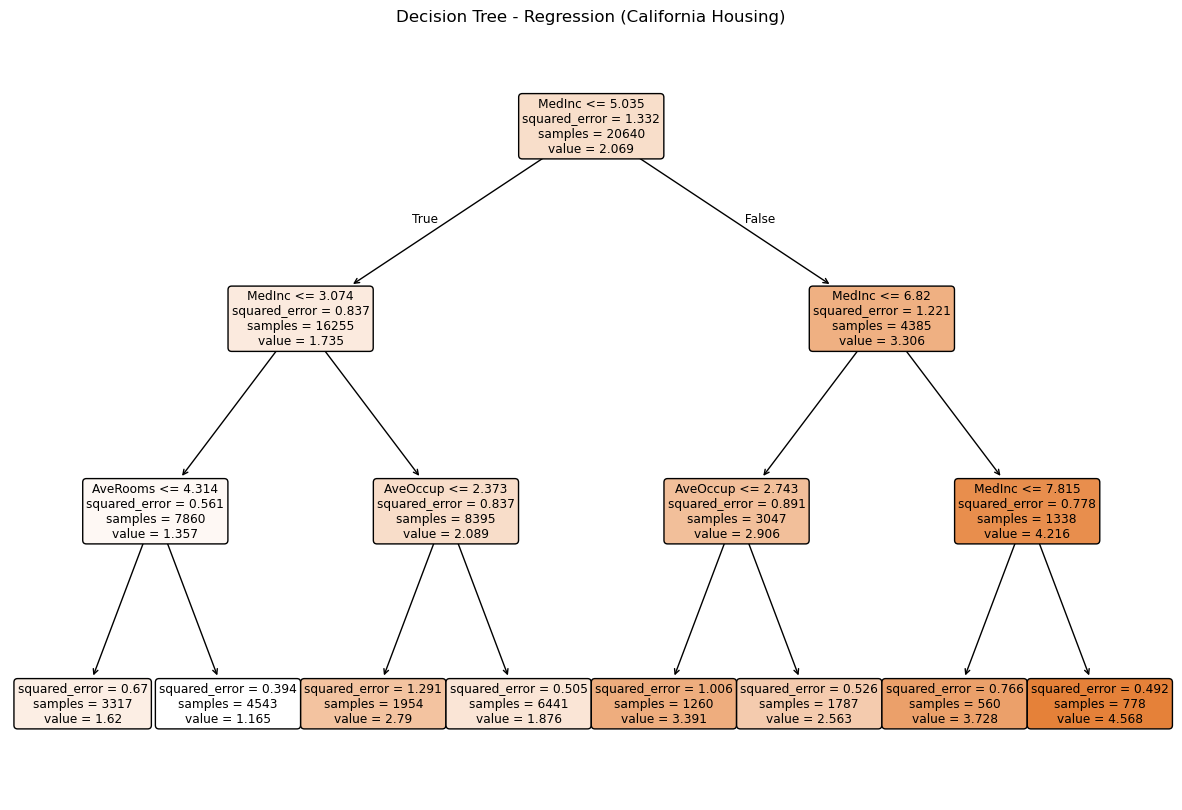

In [105]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Load dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target
# Create Decision Tree regressor
reg = DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state=42)
reg.fit(X, y)

# Visualize the tree
plt.figure(figsize=(15,10))
plot_tree(reg, 
          feature_names=housing.feature_names, 
          filled=True, 
          rounded=True)
plt.title("Decision Tree - Regression (California Housing)")
plt.show()

The plot displays a tree structure with nodes and branches.

Root node: The top node represents the first feature and threshold chosen to minimize variance in the target values.

Branches: Each branch represents a split based on a feature threshold to reduce prediction error.

Leaf nodes: Terminal nodes show the predicted house value (average of the samples in that node).

Node information: Each node displays the number of samples, mean target value, and variance.

Colors: Node colors indicate the range of predicted values—darker colors represent higher values.

---

### Gini Index/Impurity

#### 📘 Definition:
Gini Impurity measures the probability of incorrectly classifying a randomly chosen element from the dataset if it was labeled according to the distribution of labels in a node. It is used in Decision Trees to determine the best split at each node.

Step 1: Measure impurity of a node

- For the current node, calculate the Gini impurity:

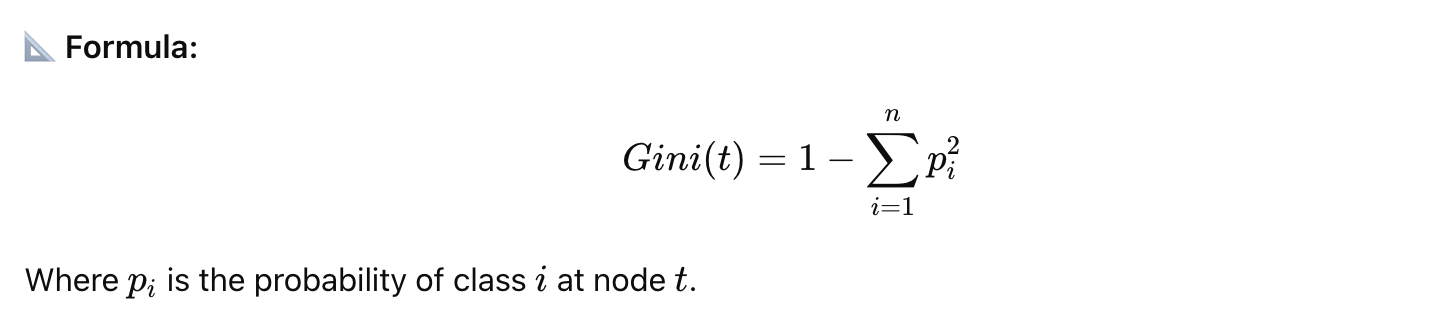

- A pure node (all samples same class) → Gini = 0

- A completely mixed node → Gini closer to maximum (0.5 for 2 classes).

Step 2: Consider possible splits

- For each feature, try different thresholds (splits).

- Example: Feature = “Income” → split at 50k:

- Left branch: Income ≤ 50k

- Right branch: Income > 50k

Step 3: Calculate weighted Gini for each split

- For a split, compute Gini impurity for each branch.

- Then compute weighted Gini based on branch sizes:
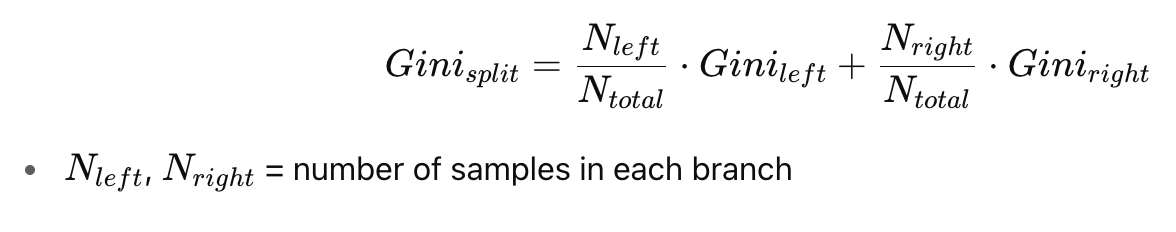

Step 4: Choose the best split

- The split with the lowest weighted Gini is selected.

- This means the split produces the purest child nodes.

Step 5: Repeat for child nodes

- Apply the same process recursively for each branch until:

    - Nodes are pure, or

    - Stopping conditions (max depth, min samples per leaf) are reached.

#### 🔧 When to Use:

- When building classification trees (e.g., CART algorithm).

- Preferred for efficiency since it is computationally less intensive than entropy.

#### 🌍 Where to Use:

- Customer segmentation in marketing.

- Fraud detection in finance.

- Categorizing medical conditions from symptoms.

#### 💡 Use Case:
If a node contains 70% class A and 30% class B, Gini measures the degree of impurity so the algorithm can split the data to improve classification accuracy.

#### ⚠️ Limitations:

- Less interpretable than entropy in terms of "information content".

- May still result in biased splits if data is imbalanced.

#### ✅ Advantages:

- Faster computation than entropy.

- Works well in practice for classification tasks.

- Does not require logarithm calculations.

#### ❓ Why is it Used?:
To find the feature split that minimizes classification error and increases node purity.

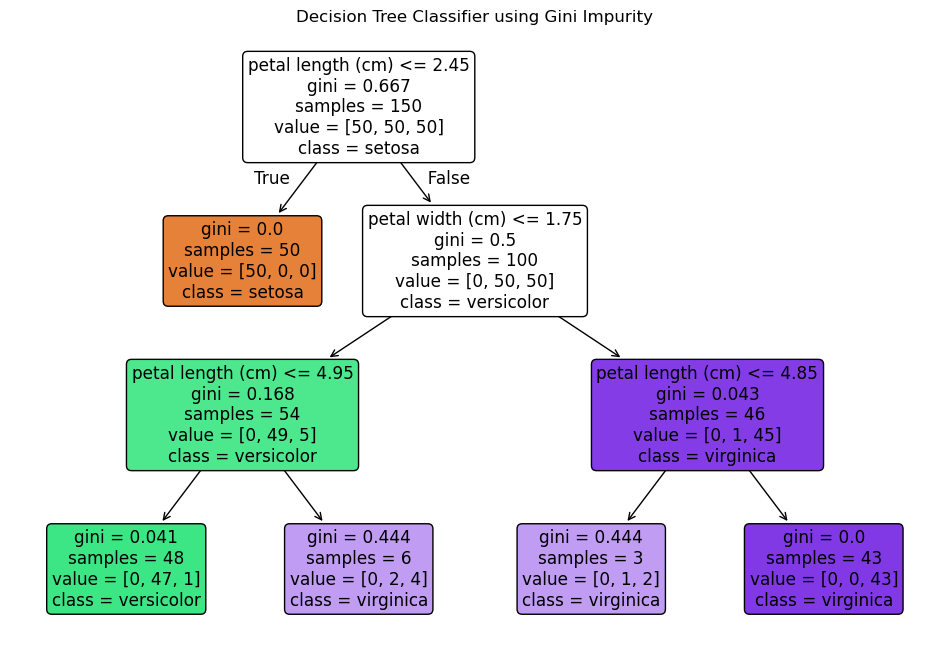

In [109]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data       # Features
y = iris.target     # Target classes

# Create Decision Tree classifier using Gini impurity
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(12,8))
plot_tree(clf, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True)
plt.title("Decision Tree Classifier using Gini Impurity")
plt.show()

The output is a graphical decision tree showing how the Iris dataset is classified using Gini impurity.

Root node:

- The top node represents the first feature and threshold chosen to split the data.

Shows:

- samples → number of samples at that node

- value → distribution of classes

- gini → impurity of the node (0 = pure, higher = mixed)

Branches:

- Each branch represents a decision based on the feature threshold (e.g., “petal length ≤ 2.45?”).

- Left branch = yes (condition satisfied), right branch = no (condition not satisfied).

Leaf nodes:

- Terminal nodes where no further splits occur.

- Show the predicted class (most common class), sample count, and class distribution.

Colors:

- Node colors indicate purity: darker = more pure (mostly one class), lighter = more mixed.

---
### Entropy

#### 📘 Definition:

Entropy measures the amount of uncertainty or disorder in a dataset. In Decision Trees, it is used to determine the best feature to split a node by quantifying the “information gain” from a split. A node with higher entropy is more impure, while lower entropy indicates more homogeneous data.

Step 1: Measure entropy of a node

- For the current node, calculate entropy:
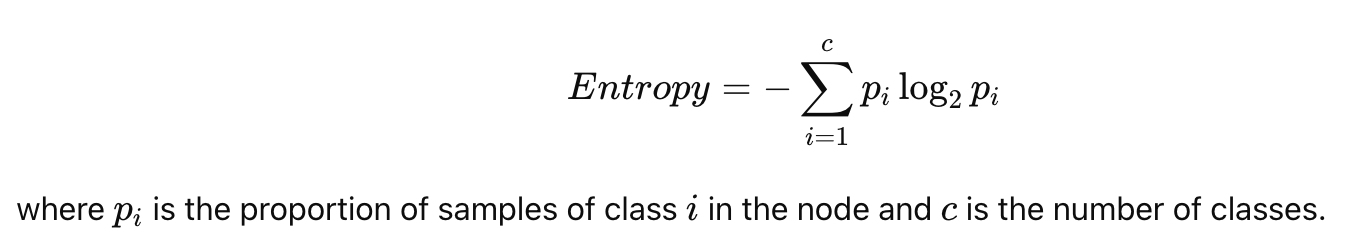

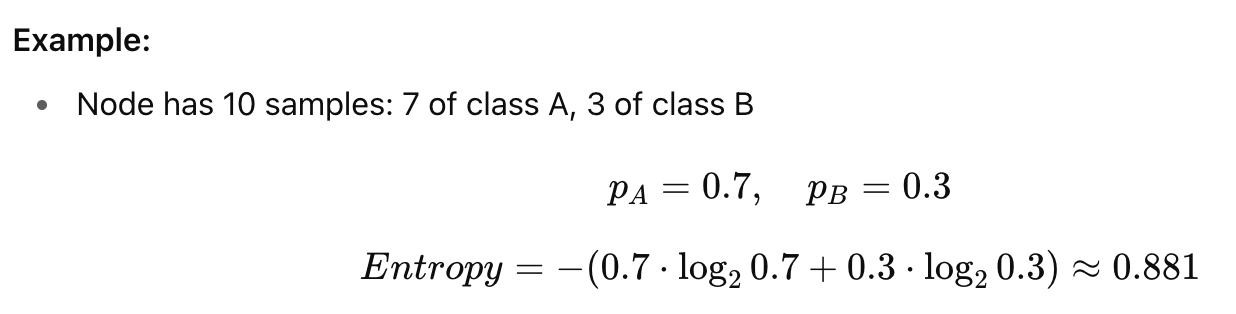

- A pure node (all samples same class) → Entropy = 0

- A completely mixed node (equal samples from all classes) → Entropy is maximum (1 for 2 classes).

Step 2: Consider Possible Splits

- For each feature, try different thresholds (splits).

- Example: Feature = Income → split at 50k:

    - Left branch: Income ≤ 50k

    - Right branch: Income > 50k

- The goal: split the node so that child nodes are more homogeneous than the parent node.

Step 3: Calculate Weighted Entropy for Each Split

1. Compute entropy for each child node after the split
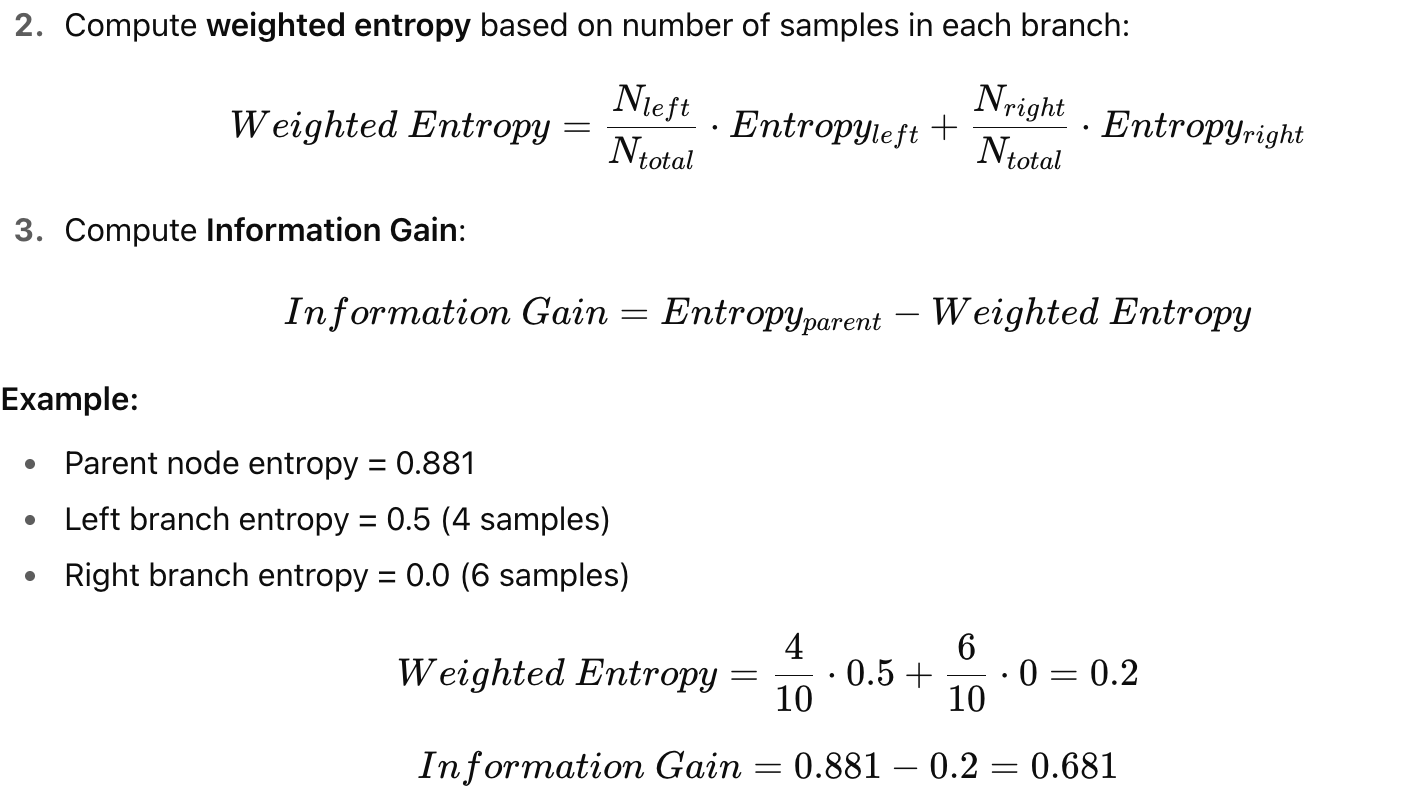

Step 4: Choose the Best Split

- Select the split with the highest Information Gain.

- Rationale: this split reduces uncertainty the most, producing child nodes that are purer.

Step 5: Repeat Recursively

- Apply the same process for each child node until:

- Node is pure (Entropy = 0) or

- Stopping criteria are met (max depth, min samples per leaf).

- This is how the Decision Tree grows recursively, creating branches that progressively reduce uncertainty.

#### 🔧 When to Use

- For classification tasks where interpretability of splits is important.

- Common in algorithms like ID3, C4.5.

#### ⚠️ Limitations

- Slightly computationally heavier than Gini (logarithms involved).

- Can favor features with more levels, potentially causing biased splits.

#### ✅ Advantages

- Provides clear, interpretable measure of uncertainty.

- Works well for multi-class classification.

- Helps identify splits that maximize reduction in uncertainty.

#### ❓ Why is it Used?

- To maximize information gain, minimize classification error, and increase purity of child nodes.

- Ensures that the tree splits on features that best reduce uncertainty.

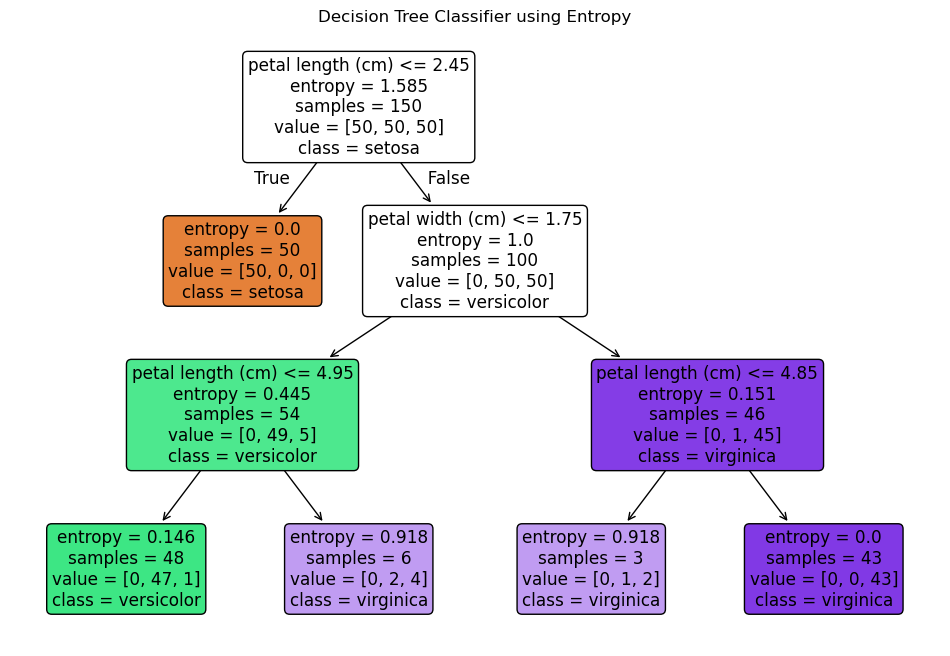

In [113]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data       # Features
y = iris.target     # Target classes

# Create Decision Tree classifier using Entropy
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(12,8))
plot_tree(clf, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True)
plt.title("Decision Tree Classifier using Entropy")
plt.show()

Root node:

- The top node represents the first feature and threshold chosen to split the data.

Shows:

- samples → number of samples at that node

- value → distribution of classes

- entropy → impurity of the node (0 = pure, higher = more mixed)

Branches:

- Each branch represents a decision based on the feature threshold.

- Left branch → samples satisfying the condition (e.g., ≤ threshold)

- Right branch → samples not satisfying the condition

Leaf nodes:

- Terminal nodes where no further splits occur.

- Show the predicted class (most common class in that node), sample count, and class distribution.

Colors:

- Node colors indicate purity: darker = more pure, lighter = more mixed.
---

### Information Gain (IG)

- Information Gain (IG) is a measure used in decision trees to quantify the effectiveness of a feature in splitting the dataset into classes.
- It calculates the reduction in entropy (uncertainty) of the target variable (class labels) when a particular feature is known.
- It helps us understand how much a particular feature contributes to making accurate predictions in a decision tree.
- It tells us how much “information” a feature provides about the target variable.

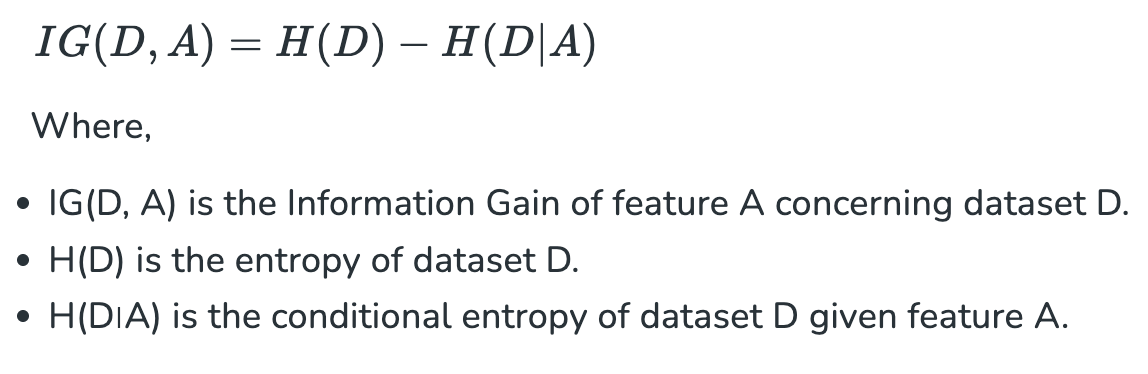

1. Entropy H(D)

   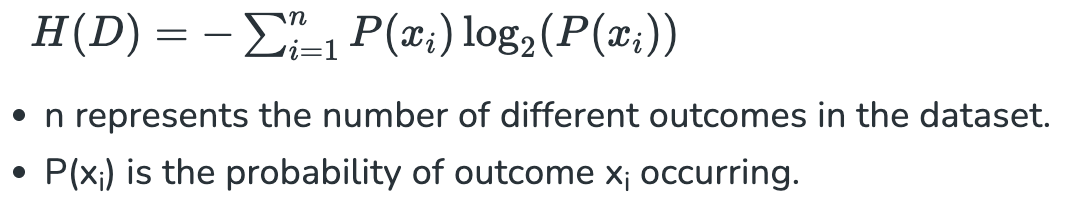

    - Measures the **uncertainty or impurity** in the dataset D.
    - n = number of classes/outcomes.
    - P(xi) = probability of class xi.
    - **Higher entropy** → more mixed classes → more uncertainty.
    - **Lower entropy** → more pure classes → less uncertainty.
    
    **Intuition:** Entropy tells us “how unpredictable the dataset is before any split.”
       
3. Conditional Entropy H(D|A)

   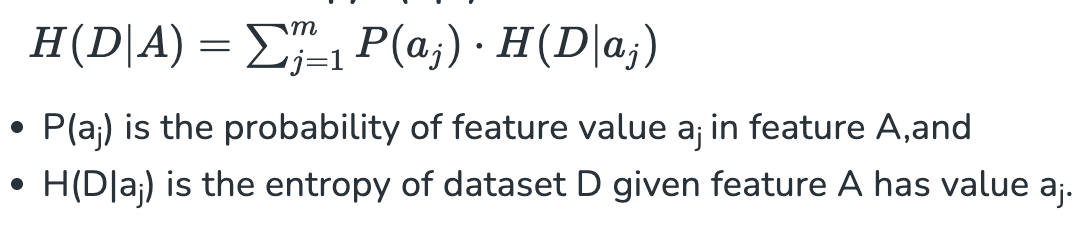

   - Measures the **uncertainty remaining after splitting** dataset D based on feature A.
    - mmm = number of unique values of feature A.
    - P(aj) = fraction of samples with feature value aj.
    - H(D∣aj) = entropy of subset of DDD where feature A=aj.

    **Intuition:** Conditional entropy tells us “how much uncertainty is left after we know the value of feature A.”

Higher information gain → better split → child nodes are purer.

#### 🔧 When to Use

Classification tasks where interpretability of “information content” is desired.

Algorithms: ID3, C4.5.

#### ⚠️ Limitations

Can favor features with many categories (splitting on unique IDs gives max IG but is meaningless).

Slightly computationally heavier than Gini (requires log calculations).

Does not handle continuous features directly without discretization or thresholds.

#### ✅ Advantages

Provides a quantitative measure of uncertainty reduction.

Helps the tree focus on features that are informative.

Works well for multi-class classification.

Easy to interpret in terms of “bits of information”.

#### ❓ Why is it Used?

To select the feature that maximizes reduction in entropy, producing purer child nodes.

Ensures that splits are meaningful, informative, and improve classification accuracy.

In [118]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Calculate Information Gain (IG) for each feature
info_gain = mutual_info_classif(X, y)
print("Information Gain for each feature:", info_gain)

Information Gain for each feature: [0.49370372 0.28597956 0.99318873 0.97422758]


---
### k-Nearest Neighbors (kNN)

#### 📘 Definition:

    kNN is a supervised machine learning algorithm used for classification and regression. It predicts the class (or value) of a data point based on the majority class (or average value) of its k nearest neighbors in the feature space.

    Non-parametric: No assumption about the data distribution.

    Lazy learner: Does not learn a model during training; stores all data and computes predictions at query time.   
- It is also frequently used in missing value imputation.

#### How does it work?
- K is the number of nearest neighbors to use. 
- For classification, a majority vote is used to determined which class a new observation should fall into.
- Larger values of K are often more robust to outliers and produce more stable decision boundaries than very small values (K=3 would be better than K=1, which might produce undesirable results.


Step 1: Choosing k in kNN

- k = number of neighbors considered for prediction.

- Larger k → more stable predictions, reduces effect of noise/outliers, decision boundaries, but may miss fine patterns.

- Too large k → model may underfit, miss important patterns.

- Pick k carefully based on dataset characteristics.

Step 2: Compute Distances

- Calculate distance between the query point and all points in the training set.

- Common distance metrics:

    - Euclidean distance (straight-line)

    - Manhattan distance (grid-like)

Step 3: Identify Nearest Neighbors

- Sort all distances and pick the k smallest distances.

- These are the k nearest neighbors.

Step 4: Make Prediction

- Classification: Majority vote of neighbors’ classes.

- Regression: Average (or weighted average) of neighbors’ target values.

Step 5: Output

- Predicted class (for classification) or predicted value (for regression).

- Example (classification):

    k = 3

    Neighbor classes = [Yes, No, Yes] → Predicted class = Yes

#### 🔧 When to Use:

- Classification or regression problems with feature similarity assumption.

- Works best with small to medium datasets.

#### 🌍 Real-World Applications:

- Handwritten digit recognition (MNIST dataset)

- Recommender systems (based on user similarity)

- Credit risk scoring

- Medical diagnosis (disease prediction based on symptoms)

#### ✅ Advantages:

- Simple and intuitive.

- No assumptions about data distribution.

- Adapts naturally to multi-class problems.

#### ⚠️ Limitations:

- Computationally expensive for large datasets (distance calculation for all points).

- Sensitive to irrelevant features and feature scaling → normalization often required.

- Sensitive to outliers (especially with small k).

#### ❓ Key Points:

- Choosing k and distance metric carefully is critical.

- Normalizing features ensures no single feature dominates the distance.

- kNN works based on “similar points have similar labels” principle.
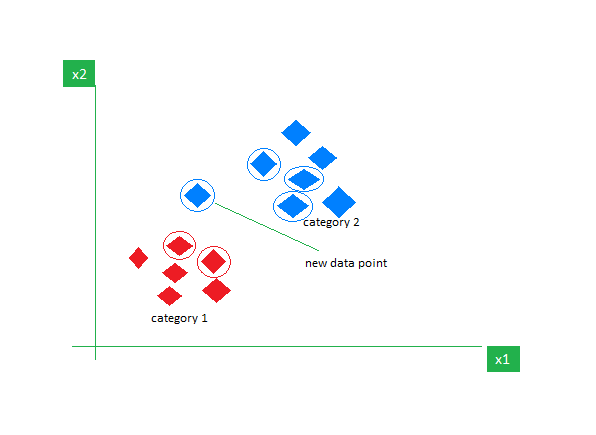

In [121]:
# kNN Classification Example
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target classes

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for distance-based algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create kNN classifier (k=3, Euclidean distance by default)
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Train the model
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [123]:
# kNN Regression Example
# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create kNN regressor (k=5)
knn_reg = KNeighborsRegressor(n_neighbors=5, metric='euclidean')

# Train the model
knn_reg.fit(X_train, y_train)

# Predict
y_pred = knn_reg.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.4324216146043236
R² Score: 0.6700101862970989


n_neighbors = k value. Adjust based on dataset size and noise.

metric='euclidean' for Euclidean distance; use 'manhattan' for Manhattan distance.

Feature scaling is crucial for kNN because distance metrics are sensitive to feature magnitude.

Works for both classification (KNeighborsClassifier) and regression (KNeighborsRegressor).

---

### Euclidean Distance

#### 📘 Definition:

Euclidean distance is the “straight-line” distance between two points in n-dimensional space. It is the most common distance metric used in kNN.

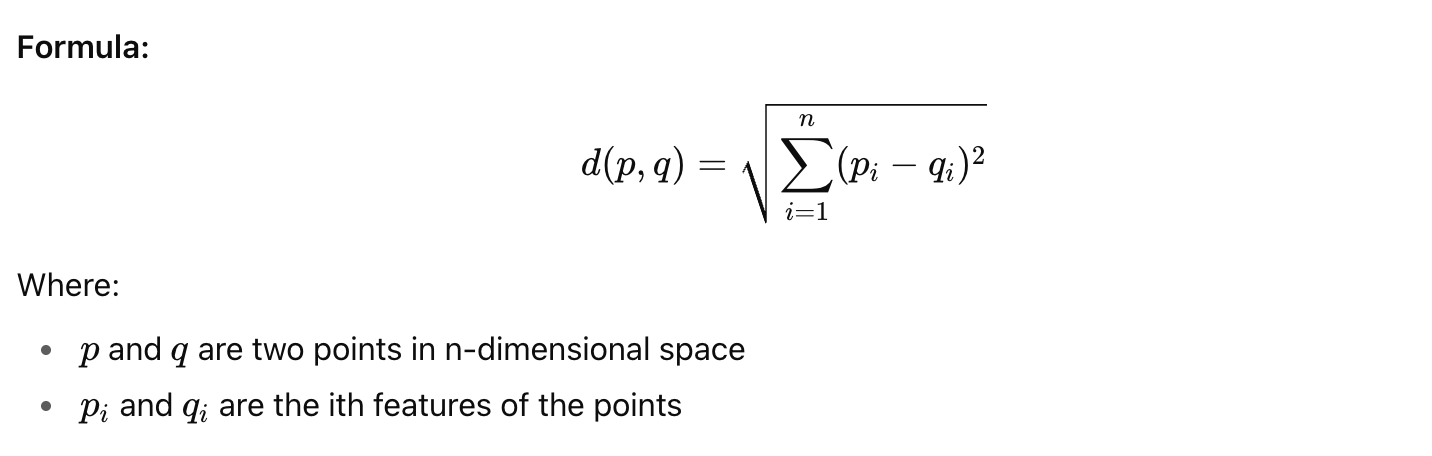

#### 🔧 How it works:

- Compute the difference between corresponding features of the two points.

- Square each difference.

- Sum all squared differences.

- Take the square root of the sum.

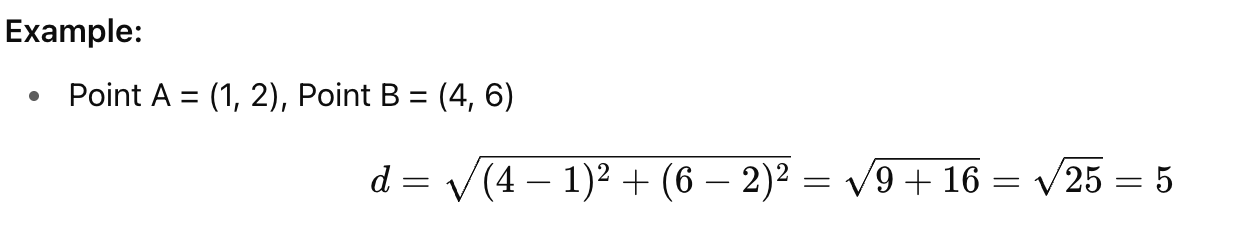

#### 🌍 Use Cases:

- Works well when all features are continuous and equally scaled.

- Suitable for most standard kNN classification or regression tasks.

#### ✅ Advantages:

- Captures true geometric distance between points.

- Simple and intuitive.

#### ⚠️ Limitations:

- Sensitive to scale differences between features → normalization often required.

- Outliers can heavily affect distance.

#### Use in kNN

In k-Nearest Neighbors, distance metrics measure how “close” two data points are.

- Measures straight-line (shortest path) distance between two points.

- Best for continuous numerical features.

---

### Manhattan Distance
#### 📘 Definition:

Manhattan distance (also called city-block distance or L1 distance) is the sum of the absolute differences of the coordinates. It measures distance as if moving along a grid-like path.

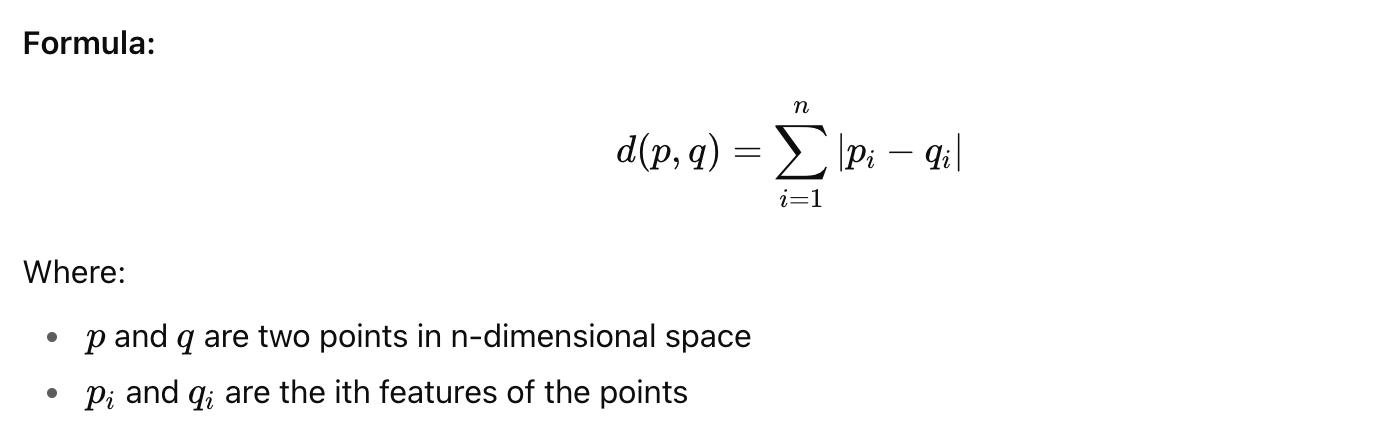

#### 🔧 How it works:

- Compute the absolute difference between corresponding features of two points.

- Sum all absolute differences.

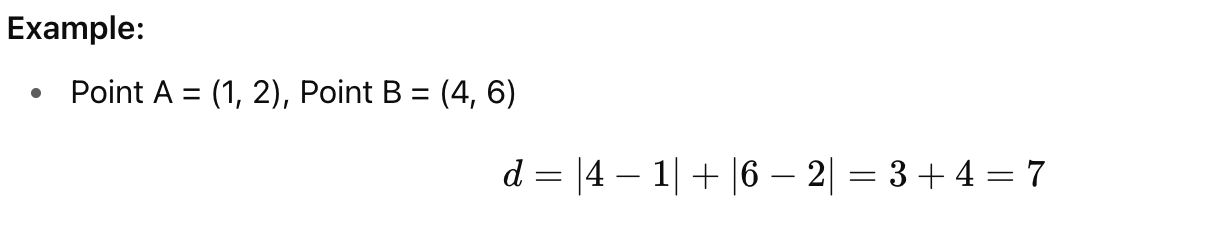

#### 🌍 Use Cases:

- Useful when you want to measure distance along axes rather than “as-the-crow-flies”.

- Works better for high-dimensional or sparse data.

#### ✅ Advantages:

- Less sensitive to outliers than Euclidean distance.

- Easier to compute than Euclidean (no square roots).

#### ⚠️ Limitations:

- Does not capture straight-line geometric distance.

- May be less intuitive for some applications.

#### Use in KNN:
- Measures distance along grid-like paths (sum of absolute differences).

- Works well for categorical or grid-structured data.

In [128]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----- kNN with Euclidean Distance -----
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
print("Euclidean Accuracy:", accuracy_score(y_test, y_pred_euclidean))

# ----- kNN with Manhattan Distance -----
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
print("Manhattan Accuracy:", accuracy_score(y_test, y_pred_manhattan))

Euclidean Accuracy: 1.0
Manhattan Accuracy: 1.0


---
## Hands on

### Implement kNN from scratch

In [132]:
# Implementing KNN from Scratch                                                                                                                                   import numpy as np

import numpy as np
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

This code creates a KNN classifier from scratch using NumPy:

- fit() – Stores training data (no real training, KNN is a lazy learner).

- euclidean_distance() – Calculates straight-line distance.

- predict() – Loops over test points, calls _predict().

- _predict() – Finds k closest points, picks the most common label.

Output: Predictions are based on majority vote among the nearest k neighbors.

In [135]:
# Using the KNN Algorithm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples = 50,
                                       n_features = 2,
                                       n_informative = 2,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [0.51, .49])
# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

# Create a KNN classifier with k=2
knn = KNN(k=2)
knn.fit(X_train, y_train)

# Predict a new data point
X_new = np.array([[5.5, 3.5]])
prediction = knn.predict(X_test)

print("Predicted class:", prediction)
print("Actual class:", y_test)

Predicted class: [1 1 1 1 0 1 1 0 0 0 1 0 0]
Actual class: [1 1 1 1 0 1 1 0 0 0 1 0 0]


This code uses the custom KNN class to classify points in a small synthetic dataset:

- Data creation: make_classification() generates 50 samples with 2 features.

- Split: train_test_split() divides data into training (75%) and testing (25%).

- Model: KNN(k=2) looks at the 2 nearest neighbors.

- Fit: Stores training data.

- Predict: Classifies each test point by majority vote from its nearest neighbors.

Output: Shows predicted labels for the test set vs. their actual labels.

---

### Visualize decision boundaries

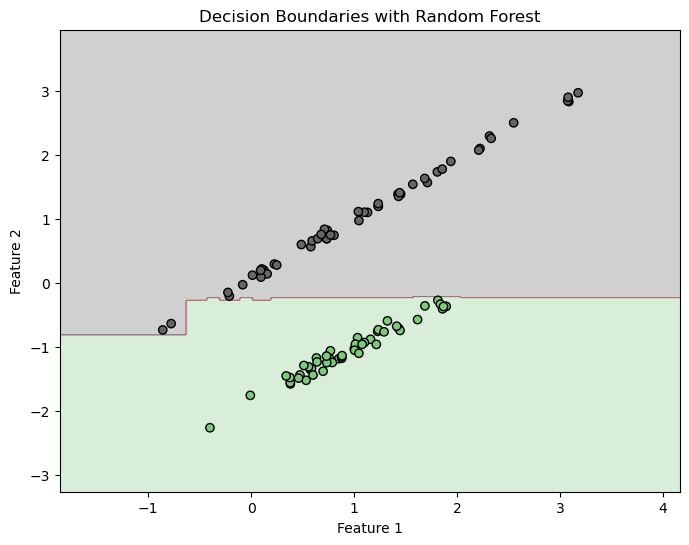

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#  Generating synthetic dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,       # 2 features for 2D visualization
    n_informative=2,    # number of informative features
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=42
)

# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Create mesh grid for plotting

h = 0.02  # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predicting for each point in grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Ploting decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Accent)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Accent)
plt.title("Decision Boundaries with Random Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### Explanation step-by-step:

- Import libraries – NumPy for data handling, Matplotlib for plotting, and sklearn for dataset creation & modeling.

- Generate dataset – make_classification() creates a synthetic binary classification problem with 2 features (for easy visualization).

- Split data – 75% training, 25% testing.

- Train model – RandomForestClassifier(n_estimators=100) fits multiple decision trees and combines their votes.

- Create mesh grid – A fine grid of points covering the feature space is created for plotting boundaries.

- Predict on grid – The classifier predicts the class for each grid point.

Plot decision boundary – plt.contourf() shows regions classified as each class; plt.scatter() plots the original data points.

#### Output meaning:

- The plot shows colored regions representing predicted classes.

- Data points are overlaid on the regions, showing how well the classifier separates them.

- This visually explains the decision-making logic of the trained Random Forest.

---

### Train a DecisionTreeClassifier on Iris dataset

In [143]:
# Importing libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#  Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

#  Spliting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#  Creating Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

#  Training the classifier
clf.fit(X_train, y_train)

#  Making predictions
y_pred = clf.predict(X_test)

#  Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


#### Explanation step-by-step:

- Import libraries – Load necessary tools from sklearn.

- Load dataset – load_iris() gives features (X) and labels (y).

- Split data – 75% training, 25% testing.

- Create model – DecisionTreeClassifier(random_state=42) ensures reproducible results.

- Train model – .fit() learns patterns from training data.

- Predict – .predict() predicts labels for test data.

- Evaluate – accuracy_score() compares predictions with actual labels.

#### Output meaning:

- The printed Accuracy (e.g., 1.0) shows the proportion of correct predictions on the test set.

- 1.0 means perfect classification — every flower in the test set was predicted correctly.